**Final Code for Big Data Project**

This document will contain the final versions of the code for the project with changes and errors corrected.

In [2]:
import pandas as pd
from patsy import dmatrices
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.discrete.discrete_model as sm
from sklearn import preprocessing

df = pd.read_csv('wpmhdata.csv', sep=',')
df = df.iloc[: , 1:-5]

**Examining the Data imported from R after preparation**

This section of the code will review the data imported from R after the preprocessing has been done. The method utilized in R allowed for greater flexibility in preparation whereas Python allowed for a more streamlined apporach to the analysis.

In [3]:
#Looking at the first 10 results of the data to ensure they match the R output
df.head(10)

,no_Employees,tech_nontech,benefits,employer_resources,anonymity_protected,leave,discussing_mh_negative,discussing_ph_negative,comfortable_coworker,comfortable_supervisor,...,share_ff,bad_response_experience,see_others_reveal,current_disorder,diagnosed,treatment,interfere_treated,interferes_not_treated,age,gender
0,26-100,1.0,NaN,No,I don't know,Very easy,No,No,Maybe,Yes,...,Somewhat open,No,NaN,No,Yes,0,NaN,NaN,39.0,Male
1,6-25,1.0,No,Yes,Yes,Somewhat easy,No,No,Maybe,Yes,...,Somewhat open,No,NaN,Yes,Yes,1,Rarely,Sometimes,29.0,Male
2,6-25,1.0,No,No,I don't know,Neither easy nor difficult,Maybe,No,Maybe,Maybe,...,Somewhat open,Maybe/Not sure,Yes,No,No,1,NaN,NaN,38.0,Male
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Neutral,No,NaN,Yes,Yes,1,Sometimes,Sometimes,43.0,Male
4,6-25,0.0,Yes,No,No,Neither easy nor difficult,Yes,Maybe,Maybe,No,...,Somewhat open,"Yes, I experienced",Yes,Yes,Yes,1,Sometimes,Sometimes,43.0,Female
5,More than 1000,1.0,Yes,No,Yes,Somewhat easy,Yes,Yes,Maybe,Yes,...,Somewhat open,"Yes, I experienced",No,Yes,No,1,NaN,Often,42.0,Male
6,26-100,1.0,I don't know,No,I don't know,Somewhat easy,No,No,Maybe,Yes,...,NaN,No,NaN,No,No,0,NaN,NaN,30.0,Male
7,More than 1000,1.0,Yes,No,Yes,Very easy,No,No,Maybe,Yes,...,Somewhat open,"Yes, I observed",Maybe,Yes,Yes,1,Sometimes,Often,37.0,Female
8,26-100,0.0,I don't know,No,I don't know,NaN,Yes,Yes,Yes,Maybe,...,Somewhat open,"Yes, I observed",No,Yes,Yes,1,Rarely,Often,44.0,Female
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Very open,No,NaN,Yes,Yes,1,Rarely,Often,30.0,Male


In [4]:
# look at meta information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   no_Employees                  1146 non-null   object 
 1   tech_nontech                  1146 non-null   float64
 2   benefits                      1063 non-null   object 
 3   employer_resources            1146 non-null   object 
 4   anonymity_protected           1146 non-null   object 
 5   leave                         878 non-null    object 
 6   discussing_mh_negative        1146 non-null   object 
 7   discussing_ph_negative        1146 non-null   object 
 8   comfortable_coworker          1146 non-null   object 
 9   comfortable_supervisor        1146 non-null   object 
 10  physical_serious              653 non-null    object 
 11  consequences_discussed        1146 non-null   object 
 12  productivity_affected         256 non-null    object 
 13  amo

**Recoding Values in order to accurately conduct Naive Bayes and Decision Tree algorithms**

This section of the code will recode and prepare the data in the python environemnt to be analysed by the required algorithms

In [5]:
#This variable lists all the categorical variables 

cat_cols=["gender","gender","tech_nontech","no_Employees","benefits","employer_resources","anonymity_protected","leave","discussing_mh_negative","discussing_ph_negative","comfortable_coworker", "comfortable_supervisor","physical_serious", "consequences_discussed","productivity_affected","amount_productivity_affected","identifing_career","coworker_negative_view",
          "share_ff","bad_response_experience","see_others_reveal","current_disorder","diagnosed","treatment","interfere_treated","interferes_not_treated"]

In [6]:
df_onehot=df.copy()

#convert only categorical variables/features to dummy/one-hot features
df_onehot = pd.get_dummies(df, columns=cat_cols, prefix = cat_cols)
df_onehot = df_onehot.iloc[:,4:]

df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 85 columns):
 #   Column                                               Non-Null Count  Dtype
---  ------                                               --------------  -----
 0   gender_Female                                        1433 non-null   uint8
 1   gender_Male                                          1433 non-null   uint8
 2   gender_Non-Binary                                    1433 non-null   uint8
 3   gender_Other Gender Identity                         1433 non-null   uint8
 4   tech_nontech_0.0                                     1433 non-null   uint8
 5   tech_nontech_1.0                                     1433 non-null   uint8
 6   no_Employees_1-5                                     1433 non-null   uint8
 7   no_Employees_100-500                                 1433 non-null   uint8
 8   no_Employees_26-100                                  1433 non-null   uint8
 9   no_Emplo

In [7]:
from sklearn.model_selection import train_test_split

class_col_name="productivity_affected_Yes"

one_hot_feature_names=df_onehot.columns[df_onehot.columns != class_col_name]

# Split dataset into training set and test set
X = list(set(list(df_onehot)) - set([class_col_name]))

X_train, X_test, y_train, y_test = train_test_split(df_onehot[X], df_onehot[class_col_name], test_size=0.25,random_state=0) # 75% training and 25% test

**Naive Bayes Algorithm**

In [8]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

#Train the model using the training sets
nbfit = nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nbfit.predict(X_test)

In [9]:
#This section will check the number of features and records to ensure they match with our original data set and that all records are analyzed appropriately

print("Number of features used ",nbfit.n_features_in_)
print("Classes ",nbfit.classes_)
print("Number of records for classes ",nbfit.class_count_)

Number of features used  84
Classes  [0 1]
Number of records for classes  [920. 154.]


**Evaluation of Naive Bayes**

In this section, I will evaluate the Naive Bayes model using a confusion matrix. This will allow me to determine if the data from this model is useful and provides relevant insights.

In [10]:
from sklearn.metrics import confusion_matrix

cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[298  11]
 [  0  50]]
TP:  50 , FP:  11 , TN:  298 , FN: 0


In [11]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       309
           1       0.82      1.00      0.90        50

    accuracy                           0.97       359
   macro avg       0.91      0.98      0.94       359
weighted avg       0.97      0.97      0.97       359



**Perform K-fold Cross Validation on the Naive Bayes model**

In [12]:
from sklearn.model_selection import KFold, cross_val_score 
k_folds = KFold(n_splits = 10)

scores = cross_val_score(nbfit, X_test, y_test, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores)) 

Cross Validation Scores:  [0.97222222 0.94444444 0.94444444 1.         0.94444444 0.97222222
 1.         1.         0.94444444 0.97142857]
Average CV Score:  0.9693650793650793
Number of CV Scores used in Average:  10


**Random Forest**

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model = RandomForestClassifier(max_depth=2)
model.fit(X_train, y_train)
print('Training Accuracy : ',
      metrics.accuracy_score(y_train,
                             model.predict(X_train))*100)
print('Validation Accuracy : ',
      metrics.accuracy_score(y_test,
                             model.predict(X_test))*100)

Training Accuracy :  89.57169459962756
Validation Accuracy :  89.41504178272982


**Visualize a tree from the Randomforest function**

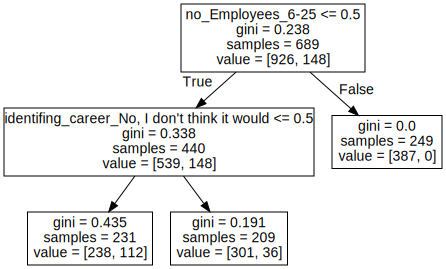

In [14]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(model.estimators_[0],feature_names=one_hot_feature_names)

graph = graphviz.Source(dot_data, format="png") 
graph

**Perform K-fold Cross Validation on the random forest model**

In [15]:
from sklearn.model_selection import KFold, cross_val_score 
k_folds = KFold(n_splits = 10)

scores = cross_val_score(model, X_test, y_test, cv = k_folds)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores)) 

Cross Validation Scores:  [0.91666667 0.86111111 0.80555556 0.97222222 0.88888889 0.88888889
 0.88888889 0.80555556 0.97222222 0.82857143]
Average CV Score:  0.8828571428571429
Number of CV Scores used in Average:  10


**Logisitic Regression with Cross Validation**

This section will utilize the logisitic regression with cross validation algorithim from sklearn to analyze the data.

In [16]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics
from sklearn.metrics import accuracy_score

logreg = LogisticRegressionCV()
logreg.fit(X_train, y_train)

y_predlr = logreg.predict(X_test)

In [17]:
print ('Logistic Regression Confusion Matrix')
predLR = y_predlr > 0.5
actualLR = y_test > 0.5
LRcm = confusion_matrix(actualLR, predLR)
print(LRcm)
print(classification_report(y_test, y_predlr))

Logistic Regression Confusion Matrix
[[309   0]
 [  0  50]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       309
           1       1.00      1.00      1.00        50

    accuracy                           1.00       359
   macro avg       1.00      1.00      1.00       359
weighted avg       1.00      1.00      1.00       359



**Perform Logistic Regression using the most important feature from the random forest model**

In [29]:
rangelen = model.feature_importances_
allgini = []
for i in range(len(rangelen)):
    hold = []
    if model.feature_importances_[i] > 0:
        hold.append(model.feature_names_in_[i])
        hold.append(model.feature_importances_[i])
        allgini.append(hold)
allgini = sorted(allgini,key=lambda x: x[1], reverse = True)
print ("The Class used in this tree is :",class_col_name)
print ()
for i in allgini:
    print (i)

The Class used in this tree is : productivity_affected_Yes

['amount_productivity_affected_26-50%', 0.16919474596745204]
['amount_productivity_affected_1-25%', 0.16625794425053197]
['consequences_discussed_No', 0.13029698134619885]
['discussing_ph_negative_No', 0.10139551431432478]
['employer_resources_No', 0.07599704837841088]
["anonymity_protected_I don't know", 0.04510506877021049]
['tech_nontech_1.0', 0.03990157885637233]
['amount_productivity_affected_51-75%', 0.03358465307970457]
['benefits_Yes', 0.03181861379646131]
['comfortable_coworker_No', 0.02423349846234847]
['comfortable_coworker_Maybe', 0.023644894094432906]
['comfortable_supervisor_Yes', 0.021010726426836327]
['discussing_mh_negative_No', 0.020912608096046524]
['comfortable_supervisor_Maybe', 0.020521800973023953]
['discussing_mh_negative_Maybe', 0.017603947899966374]
['comfortable_supervisor_No', 0.014478849934961619]
['amount_productivity_affected_76-100%', 0.008489659457599656]
['physical_serious_Yes', 0.006350683867

In [19]:
from sklearn.linear_model import LogisticRegression

new_X = X_train[[allgini[1][0]]]
new_y = y_train

X_trainlr, X_testlr, y_trainlr, y_testlr = train_test_split(new_X, new_y, test_size=0.25, random_state=0)

lr = LogisticRegression()
lrmodel = lr.fit(X_trainlr, y_trainlr)

y_predlr = lr.predict(X_testlr)

print(classification_report(y_testlr, y_predlr))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       231
           1       1.00      0.47      0.64        38

    accuracy                           0.93       269
   macro avg       0.96      0.74      0.80       269
weighted avg       0.93      0.93      0.91       269



**Spearman Correlation Matrix**

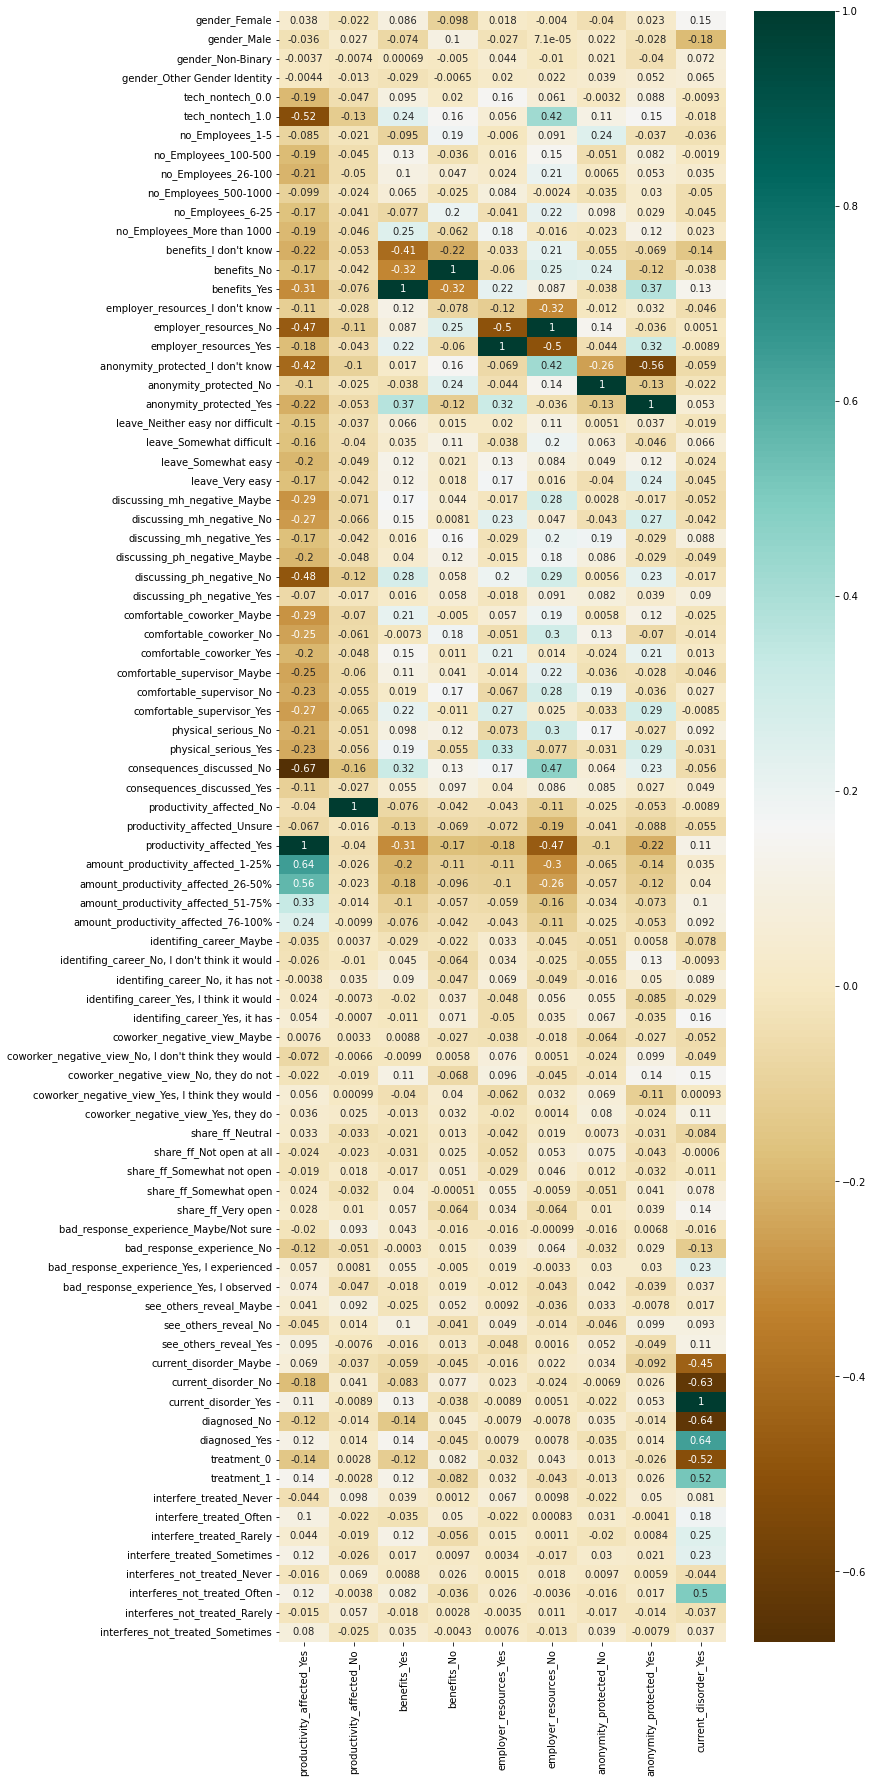

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

df_sp = df_onehot.copy()

corrtry = df_sp.corr(method="spearman")[['productivity_affected_Yes', 'productivity_affected_No','benefits_Yes','benefits_No','employer_resources_Yes','employer_resources_No', 'anonymity_protected_No', 'anonymity_protected_Yes', 'current_disorder_Yes']]

fig, ax = plt.subplots(figsize=(10,30))

hm = sns.heatmap(corrtry, annot = True, ax=ax, cmap='BrBG')
hm_fig = hm.get_figure()
hm_fig.savefig('Spearman Correlation Heatmap.png')
plt.show(hm)